In [44]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog
from moviepy.editor import VideoFileClip
%matplotlib inline

# 1. Get Data

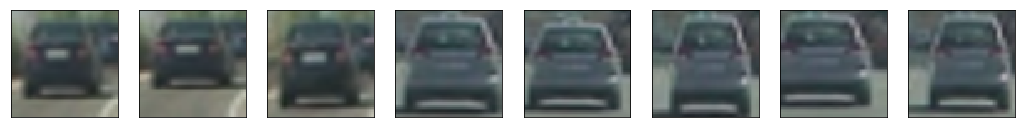

Total vehicle: 8792
Image size: (64, 64, 3)


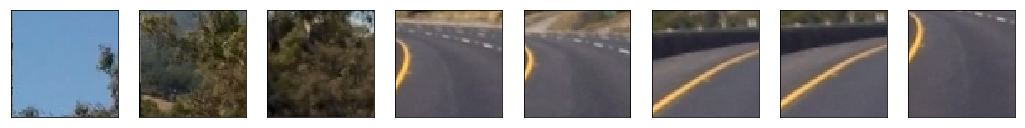

Total non-vehicle: 9666
Image size: (64, 64, 3)


In [28]:
# Grab all the training images
vehicles = glob.glob('training_data/vehicles/*/*.png')
non_vehicles = glob.glob('training_data/non-vehicles/*/*.png')

# Plot some sample vehicle images
img_cnt = 8
f, ax = plt.subplots(1, img_cnt, figsize = (18, 16))
for i in range(0, img_cnt):
    sample = mpimg.imread(vehicles[i])
    ax[i].imshow(sample)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()
print('Total vehicle: %d' %len(vehicles))
img_size = sample.shape
print('Image size: {}'.format(img_size))

# Plot some sample non-vehicle images
f, ax = plt.subplots(1, img_cnt, figsize = (18, 16))
for i in range(0, img_cnt):
    sample = mpimg.imread(non_vehicles[i])
    ax[i].imshow(sample)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()
print('Total non-vehicle: %d' %len(non_vehicles))
img_size = sample.shape
print('Image size: {}'.format(img_size))

In [34]:
# Get the X training tdata
X = np.zeros( (len(vehicles) + len(non_vehicles), *img_size), dtype=np.float32)
i = 0
for img in vehicles:
    X[i,:,:,:] = mpimg.imread(img)
    i += 1
for img in non_vehicles:    
    X[i,:,:,:] = mpimg.imread(img)
    i += 1
    
print(X.shape)

(18458, 64, 64, 3)


In [43]:
# Get the y training data
y = np.hstack((np.ones(len(vehicles)), np.zeros(len(non_vehicles)))).astype(np.float32)
print(y.shape)

(18458,)


# 2. Feature Selection

In [45]:
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                     vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features
    

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # Append the new feature vector to the features list
        features.append(hog_features)
    # Return list of feature vectors
    return features